# Assignment for Unit 2 content

This exercise is intended to help you become familiar with the tools and libraries that you will be using throughout research and this VIP class. You can use the following resources to help you!

- *https://huggingface.co/learn/audio-course/chapter2/audio_classification_pipeline*
- *https://huggingface.co/learn/audio-course/chapter2/asr_pipeline*
- The other notebooks in this repo on audio and datasets

Your task is:
1. Use Datasets to load the train split of the facebook/voxpopuli dataset in language of your choice in streaming mode.
2. Get the third example from the train part of the dataset and explore it. Given the features that this example has, write at least 3 kinds of audio tasks you can perform with this dataset.
3. Plot this example’s waveform and spectrogram.
4. Go to HuggingFace Hub, explore pretrained models and find one that can be used for automatic speech recognition for the language that you have picked earlier. Instantiate a corresponding pipeline with the model you found, and transcribe the example.
5. Write a few sentences comparing the transcription that you get from the pipeline to the transcription provided in the example.

If you struggle with this exercise, feel free to take a peek at an example solution here: *https://colab.research.google.com/drive/1NGyo5wFpRj8TMfZOIuPaJHqyyXCITftc?usp=sharing*.

Discovered something interesting? Found a cool model? Got a beautiful spectrogram? Post about your work in the group Teams chat!

In [1]:
!pip install datasets[audio]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

vox = load_dataset("facebook/voxpopuli", name="lt", split="train")
example = vox[2]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for facebook/voxpopuli contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/facebook/voxpopuli
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  wa

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [3]:
example

{'audio_id': '20150310-0900-PLENARY-16-lt_20150310-16:53:55_5',
 'language': 15,
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/8dc91c9a5ed921d4272af3113bda7975b8963b56caf0f500ed02bdd7c69d1177/train_part_0/20150310-0900-PLENARY-16-lt_20150310-16:53:55_5.wav',
  'array': array([-0.01412964,  0.00665283,  0.00842285, ...,  0.04394531,
          0.04458618,  0.04211426]),
  'sampling_rate': 16000},
 'raw_text': 'sukčiavimo ir 70 proc.',
 'normalized_text': 'sukčiavimo ir septyniasdešimt proc.',
 'gender': 'male',
 'speaker_id': '96680',
 'is_gold_transcript': True,
 'accent': 'None'}

2) Given the sampling_rate and array of the audio sample, we can produce a graph of its waveform, a frequency spectogram to view the most prominent frequencies/notes, and a mel-spectrogram to gain a more humanistic representation of the audio sample.

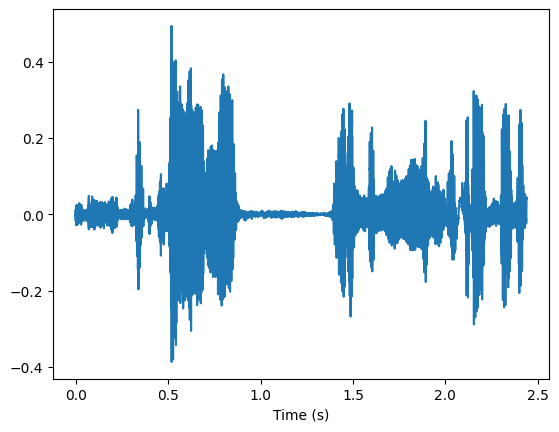

In [4]:
#waveform graph
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
time = np.linspace(0, len(example['audio']['array'])/example['audio']['sampling_rate'], num=len(example['audio']['array']))  # Creates a list of linearly increasing numbers, with the nth entry containing the time of the nth sample in seconds
plt.plot(time, example['audio']['array'])  # Plot the time array on the x-axis and the sound array on the y-axis
plt.xlabel("Time (s)")
plt.show()

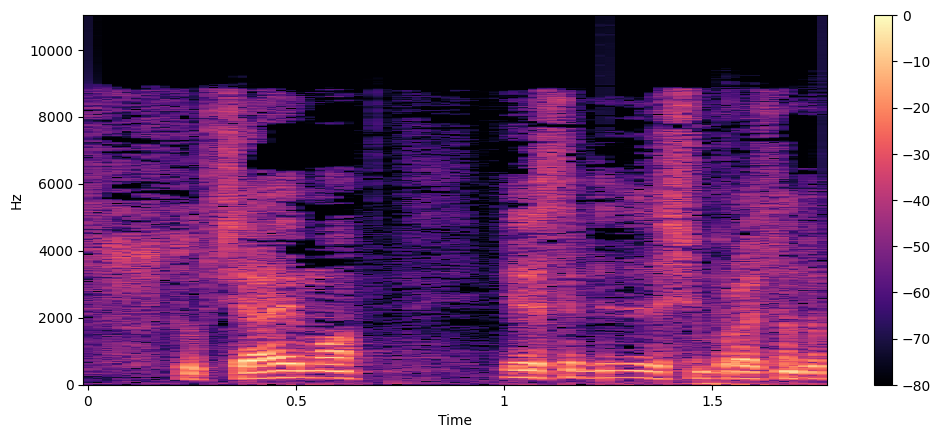

In [5]:
#spectogram
import librosa  # For manipulating audio
D = librosa.stft(example['audio']['array'])
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

In [6]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition", model="DeividasM/wav2vec2-large-xlsr-53-lithuanian")

config.json:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:381: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at DeividasM/wav2vec2-large-xlsr-53-lithuanian were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at DeividasM/wav2vec2-large-xlsr-53-lithuanian and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0']
You s

tokenizer_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/158 [00:00<?, ?B/s]

In [7]:
print(asr(example["audio"]["array"]))
print(example["raw_text"])

{'text': 'stukčiajimo ir savidite šimprocentr'}
sukčiavimo ir 70 proc.


In [14]:
from IPython.display import Audio

Audio(example["audio"]["array"], rate=15000)

While difficult to clearly tell (probably from my end mostly), the model does a really good job of accurately pronouncing the given example phrase. With getting the exact pronunciation, there are however some parts where the audio starts to mumble or sound a little muted/less clear. The model has some parts to fix in terms of getting the fine details, but I believe someone who speaks and understands Lithuanian can understand what the given audio means.